In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
import pywt
from scipy.signal import chirp, spectrogram
from StoSpecRep.console import console
from StoSpecRep.waveletEPSD import CWTx
from StoSpecRep.utils import save2Vis

In [2]:
%matplotlib widget

In [3]:
# set up a global plt style for the script
# plt.style.use('classic')
plt.rcParams.update({
        # "font.size": 9,
        "text.usetex": True,
        "font.family": "serif",
        # "figure.figsize": (4, 3),
        # "legend.fontsize": 'medium',
        })

In [4]:
%load_ext autoreload
%autoreload 2

# An example of a chirp signal

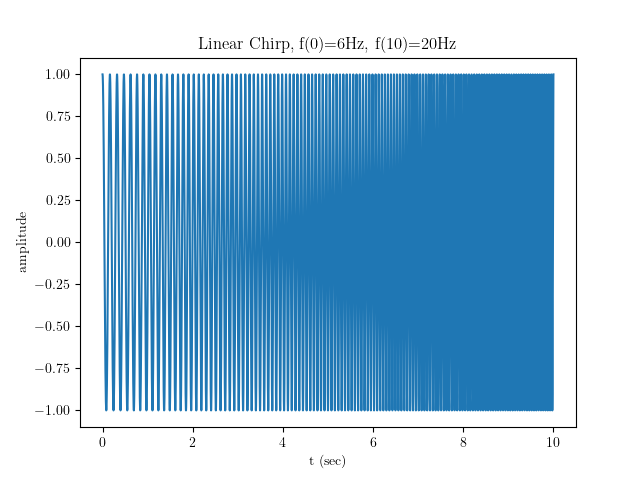

In [5]:
fig=plt.figure()
fs = 2000
duration = 10
# the total number N 
N = fs * duration
dt = 1/fs
t = np.linspace(0, duration, N)
w = chirp(t, f0=6, f1=20, t1=10, method='linear')
plt.plot(t, w)
plt.title("Linear Chirp, f(0)=6Hz, f(10)=20Hz")
plt.xlabel('t (sec)')
plt.ylabel('amplitude')
plt.show()

In [6]:
len(w)

20000

## EPSD estimation using `STFT`

In [ ]:
ff, tt, Sxx = spectrogram(w, fs=fs, nperseg=512, nfft=1024)

In [ ]:
console.print("Spectrogram shape:", Sxx.shape)

In [ ]:
ff.shape

In [ ]:
tt.shape

In [ ]:
# tweak a bit
fig=plt.figure()
plt.pcolormesh(tt, ff, Sxx, cmap='BuPu', shading='nearest')
plt.colorbar()
plt.ylim([0, 20])

In [ ]:
def plot_spectrogram(title, w, fs):
    """ self customized func for plotting spectrogram """
    
    ff, tt, Sxx = spectrogram(w, fs=fs, nperseg=2048, noverlap=512, nfft=2048)
    # plt.pcolormesh(tt, ff[:145], Sxx[:145], cmap='gray_r', shading='gouraud')
    plt.pcolormesh(tt, ff, Sxx, cmap='BuPu', shading='nearest')   # tweak with cmap and shading
    plt.title(title)
    plt.xlabel('t (sec)')
    plt.ylabel('Frequency (Hz)')
    plt.grid()

In [ ]:
fig=plt.figure()
plot_spectrogram(f'Quadratic Chirp by STFT', w, fs)
plt.ylim([0, 20])
plt.colorbar()
plt.show()

## EPSD estimation using `CWT`

Note that the coefficients are in the shape of `(length of given scales, length of input signal)` ==> `

In [7]:
demo_instance = CWTx(signal=w, fs=fs, t_axis=t)

In [8]:
demo_instance.check_scales(a=6, b=10, num=30)

(a=6,b=10) ==> scales_range(64.0, 1024.0) ==> FreqRange(low=1.5869140625, high=25.390625)

In [9]:
# console.print(demo_instance.freqhelper(CWTx.goto_scales))

In [10]:
# propose scales to use
demo_instance.propose_scales(a=6, b=10, num=300)

You've proposed scales:

(a=6,b=10) ==> scales_range(64.0, 1024.0) ==> FreqRange(low=1.5869140625, high=25.390625)

In [11]:
# compute EPSD by wavelet transform
demo_instance.computeEPSD()

Computing based on the recording


Yo! Computing EPSD with the proposed scales

Swt shape: (300, 20000)

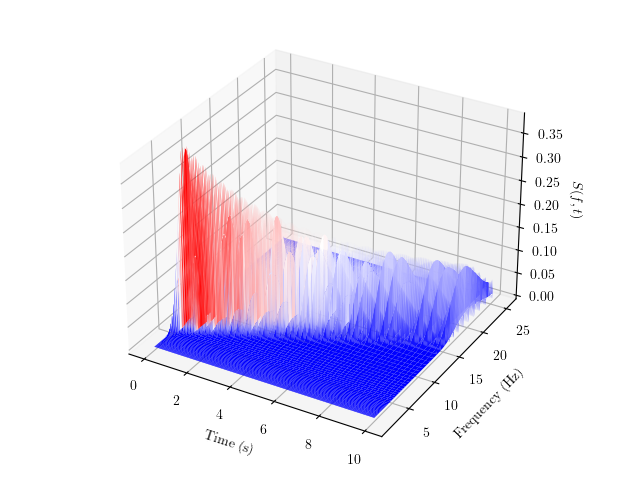

In [23]:
''' old implemnetation '''
# demo_instance.plot_waveletEPSD(option='2d')
# demo_instance.plot_waveletEPSD(option='3d')

demo_instance.plot_3dEPSD_defaultRange(external_EPSDbundle=None)

In [27]:
save2Vis('linearChirp_EPSD')

# Another chirp example

Calling the underlying `pywt.cwt()` method

In [14]:
# Define signal
fs = 128.0
sampling_period = 1 / fs
t = np.linspace(0, 2, int(2 * fs)) # time only 2 seconds
x = chirp(t, f0=10, t1=2, f1=40, method='quadratic')

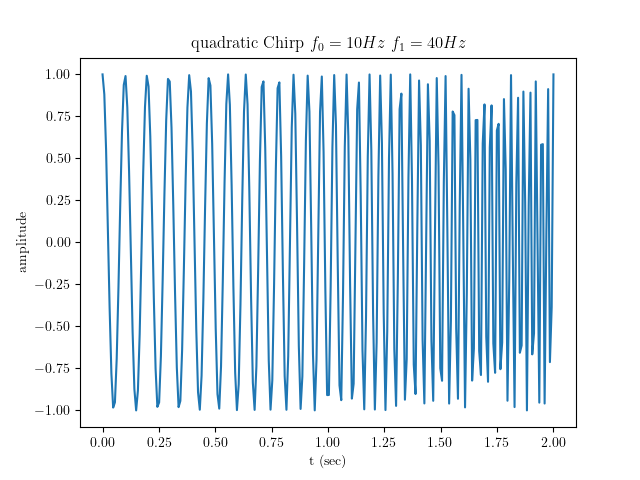

In [15]:
fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_title("quadratic Chirp " + r"$f_{0}=10Hz$" + ' ' + r"$f_{1}=40Hz$")
ax.set_xlabel('t (sec)')
ax.set_ylabel('amplitude')
plt.show()

In [16]:
# Calculate continuous wavelet transform
coef, freqs = pywt.cwt(x, np.arange(1, 50), 'morl',
                       sampling_period=sampling_period)

In [17]:
freqs

array([104.        ,  52.        ,  34.66666667,  26.        ,
        20.8       ,  17.33333333,  14.85714286,  13.        ,
        11.55555556,  10.4       ,   9.45454545,   8.66666667,
         8.        ,   7.42857143,   6.93333333,   6.5       ,
         6.11764706,   5.77777778,   5.47368421,   5.2       ,
         4.95238095,   4.72727273,   4.52173913,   4.33333333,
         4.16      ,   4.        ,   3.85185185,   3.71428571,
         3.5862069 ,   3.46666667,   3.35483871,   3.25      ,
         3.15151515,   3.05882353,   2.97142857,   2.88888889,
         2.81081081,   2.73684211,   2.66666667,   2.6       ,
         2.53658537,   2.47619048,   2.41860465,   2.36363636,
         2.31111111,   2.26086957,   2.21276596,   2.16666667,
         2.12244898])

Text(0.5, 0, 'Time (sec)')

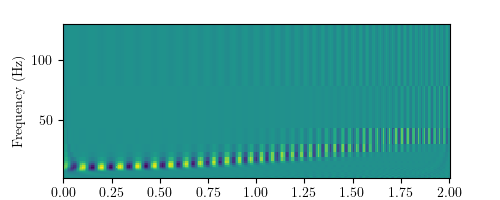

In [18]:
# Show w.r.t. time and frequency
plt.figure(figsize=(5, 2))
plt.pcolor(t, freqs, coef)

# Set yscale, ylim and labels
# plt.yscale('log')
# plt.ylim([1, 100])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
# plt.savefig('egg.png', dpi=150)